In [4]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib.request  as urllib2 
import bs4 #this is beautiful soup

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import time
import re


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


## 1. A Century of Population Change in the Age and Sex Composition of the Nation：


- Message: 
    1. The visualization is trying to present the change of the distribution of population over time in terms of ages.
    2. We can also infer from the visualization about the difference between female population and male population over time.


- Pros:
    1. With multiple paired histogram plot, the visualization show us the tendency of change in the age and sex composition in the nation
    2. Since the longest bar indicates the value which has greatest proportion of population, we can easily see how old most of people are in that year.
    3. The visualization uses two colors to represent female and male. This allows us to easily distinguish and even do some visual comparison the distribution of male from female.
    4. The animation function embedded in this visualization really help people to perceive the changes in age and sex composition effortlessly. 


- Cons:
    1. Unfortunately, from 1900 – 1939 the graph chooses to aggregate people who is above 75 years old into one group instead of distributing them into multiple bar according to their ages. Consequently, we see 75 years old distribution bar is extremely long compared to the rest of the distribution. This may result of unconscious misinterpretation if people scan through the graph too fast without reading the note on the chart.
    2. The maximum age value is 100 in this visualization. In my opinion, having 100 years old as maximum age value might not be enough if people want to use this visualization to explore the population distribution after 2000, since people tend to live longer and using one distribution bar to represent the people who is older than 100 years old might be misleading in some cases.



## Note for dataset in second part:
> The dataset is collected from Good Smile Company Website by using python web scrape package 'BeautifulSoup'

In [5]:
url = 'http://www.goodsmile.info/en/nendoroid601-700'
source = urllib2.urlopen(url).read()
bs_tree_main = bs4.BeautifulSoup(source, 'lxml')

In [6]:
bs_tree_main.find_all('div', class_='hitBox')
external_links = []
for div in bs_tree_main.find_all('div', class_='hitBox'):
    a = div.find_all('a')[0]
    external_links.append(a.get('href'))



In [7]:
product_url = 'http://www.goodsmile.info/en/product/5441/Nendoroid+Futaba+Ichinose.html'
product_source = urllib2.urlopen(product_url).read()
bs_tree = bs4.BeautifulSoup(product_source, 'lxml')


In [9]:
product_data = []

for i in range(50):
    product_dict = {}
    product_url = external_links[i]
    product_source = urllib2.urlopen(product_url).read()
    bs_tree = bs4.BeautifulSoup(product_source, 'lxml')
    
    # Get information for a single Nendoroid
    product_dict['Product Name'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[0].text
    product_dict['Series'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[1].text
    product_dict['Manufacturer'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[2].text
    product_dict['Category'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[3].text
    product_dict['Release Date'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[4].text
    product_dict['Sculptor'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[6].text
    product_dict['Series'] = bs_tree.find('dt', text = 'Product Name').find_next_siblings('dd')[1].text
    # Get Price data
    try:
        product_dict['Price'] = bs_tree.find('dd', itemprop='price').text
    except:
        product_dict['Price'] = 'NaN'
    # Append the product data to list of data
    product_data.append(product_dict)
    
    time.sleep(1)

    

In [10]:
product_data
df = pd.DataFrame(product_data)

In [11]:
df_original_new = pd.DataFrame(product_data)

df_original_new.iloc[:,1] 
df_new = df_original_new


In [ ]:
df_new = df[df['Price'] != 'NaN']

df_new['Manufacturer'] = df_new['Manufacturer'].str.replace(r'\W','')
df_new['Price'] = df_new['Price'].str.replace(r'\s|\D','')
df_new['Category'] = df_new['Category'].str.replace(r'\W', '')

df_new['Price'] = df_new.Price.astype(int)

## 2.  Visualization

### a. Histogram

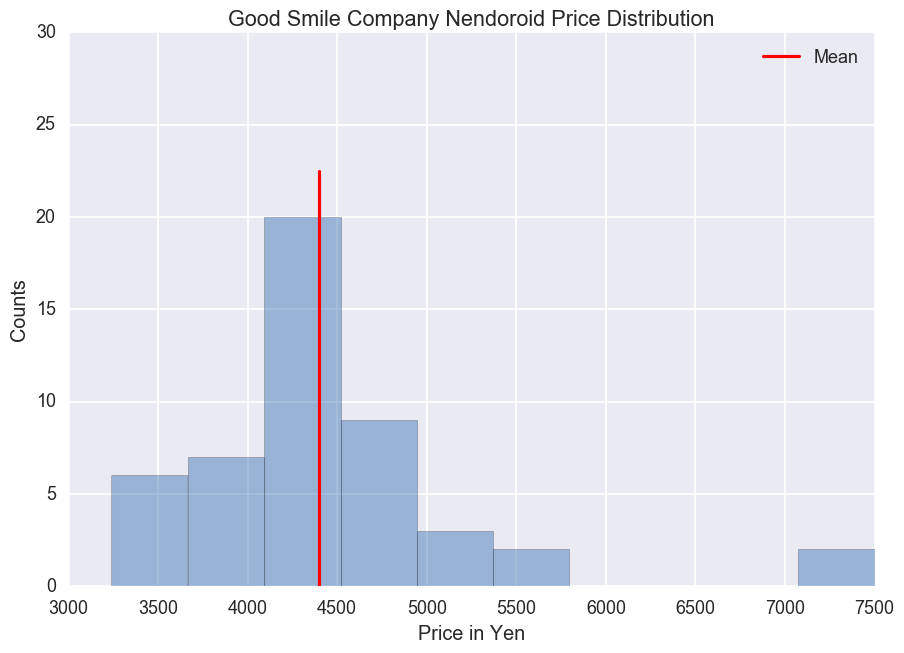

In [55]:
mean_p = df_new.Price.mean()
with sns.axes_style("darkgrid"):
    df_new.Price.hist(alpha=0.4, color = '#1e62aa')
    plt.axvline(mean_p, 0, 0.75, color='r', label='Mean')
    plt.xlabel("Price in Yen")
    plt.ylabel("Counts")
    plt.title("Good Smile Company Nendoroid Price Distribution")
    plt.ylim(ymax = 30, ymin = 0)
    plt.legend()

### Justification
> The main purpose of this visualization is to explore the distribution of Product Price in Good Smile Company. I choose this histogram because it can provide people an overall distribution trends of data points and the skewness of this distribution. Furthermore, compared to the line plot, histogram can handle large range values (3000-7500 in this case) and work well with disjoint data points ( our dataset does not have value from 6000-7000).

### b. Line Plot Visualization

In [97]:

grouped_data = df_new.groupby(df_new['Release Date'])
counts = grouped_data['date counts'].count()
counts = pd.DataFrame(counts)
counts
#counts['Release Date'] = counts.index
counts.reset_index(level=0, inplace=True)


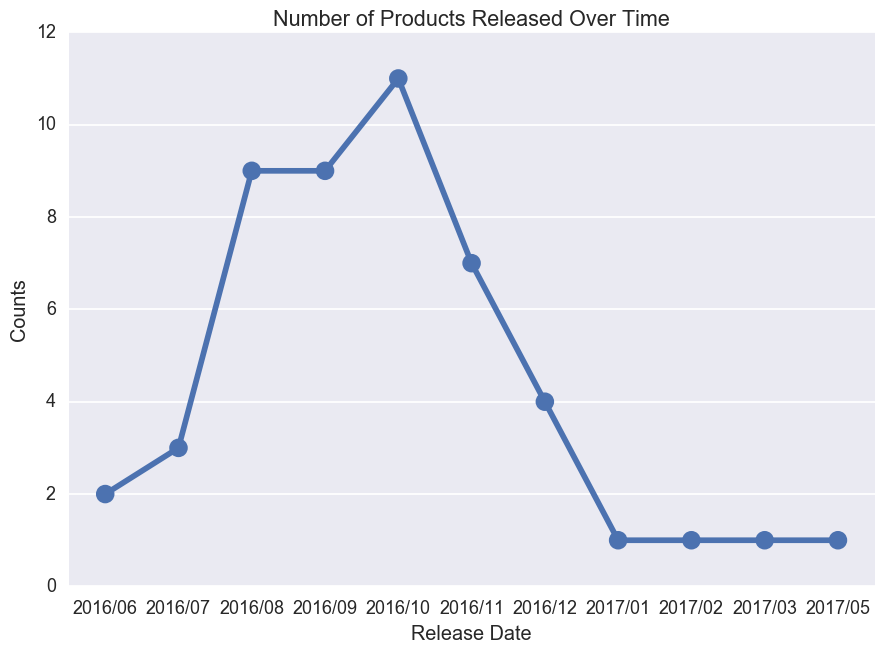

In [98]:
with sns.axes_style("darkgrid"):
    sns.pointplot(x="Release Date", y="date counts", data=counts);
    plt.xlabel("Release Date")
    plt.ylabel("Counts")
    plt.title("Number of Products Released Over Time")
    

### Justification:
> In this visualization, I am trying to explore the correlation of the number of new products being released and release month. Because there are one categorical variables and one numerical variables in this graph, I cannot use scatter plot. Even though bar plot can be used in this case, the main purpose of this visualization is to provide impression of product release tendency in a clear and succinct wat. Therefore, I think line plot works best in this case.